In [1]:
import pandas as pd
import numpy as np
import matplotlib.colors as colors
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.cm as cm
import textwrap
from google.colab import drive


# Visualisation des données

Cette partie a pour but de visualiser les données et de se familiariser avec les données manipulées. 

Le jeu de données utilisé correspond à l'ensemble des accidents recensés dans la ville de chicago. Ce sont des données extraites de rapport de police. 

Nous disposons des données de 2012 à 2020. Les données sont actualisés tous les jours et sont accessibles sur le site suivant : https://data.cityofchicago.org/Transportation/Traffic-Crashes-Crashes/85ca-t3if/data 

# I/ Importation des données

Ici, le dataset "chicago_crashes_cleanned_32.csv" est le jeu de données obtenu après nettoyage des premières données brut. Nous avons gardé dans ce dataset uniquement les variales interessantes, avons convertie toutes les données dans un format adéquat et comblé les données manquantes. 

Une partie des colonnes du dataset original sont inutilisables car elles sont majoritairement vides (colonne disant si l'accident vient de l'ouverture de la porte de la voiture, colonne indiquant si l'accident a eu lieu dans une zone en chantier,...) donc nous avons du les retirer. Une autre partie des colonnes n'est pas intéressante pour notre étude (existence de photos de l'accident, colonnes relatives au travail policier autour de l'accident,...).

Sur les 49 colonnes originelles, nous avons donc décidé de garder seulement 25 colonnes.

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [24]:
#data = pd.read_csv(r"C:\Users\pierr\Documents\FISE A2\Data Science\Traffic accidents\chicago_crashes_cleaned_32.csv", sep= ",")
#data_0 = pd.read_csv(r"C:\Users\pierr\Documents\FISE A2\Data Science\Traffic accidents\Traffic_Crashes_-_Crashes Chicago.csv")
data = pd.read_csv("/content/drive/MyDrive/DaSci/Dataset/chicago_crashes_cleaned_32.csv", sep=",")
data_0 = pd.read_csv("/content/drive/MyDrive/DaSci/Dataset/Traffic_Crashes_-_Crashes Chicago.csv", sep=",")
data_1 = pd.read_csv("/content/drive/MyDrive/DaSci/Dataset/chicago_crashes_cleaned_{}.csv", sep=",")

In [14]:
data.head()

,Unnamed: 0,CRASH_DATE,POSTED_SPEED_LIMIT,TRAFFIC_CONTROL_DEVICE,DEVICE_CONDITION,WEATHER_CONDITION,LIGHTING_CONDITION,FIRST_CRASH_TYPE,TRAFFICWAY_TYPE,ROADWAY_SURFACE_COND,CRASH_TYPE,INTERSECTION_RELATED_I,NOT_RIGHT_OF_WAY_I,DAMAGE,PRIM_CONTRIBUTORY_CAUSE,SEC_CONTRIBUTORY_CAUSE,STREET_NO,STREET_DIRECTION,STREET_NAME,LATITUDE,LONGITUDE,CRASH_WEEKDAY,CRASH_HOUR,CRASH_Month,grid
0,3,2017-06-30 16:00:00,35,STOP SIGN/FLASHER,FUNCTIONING PROPERLY,CLEAR,DAYLIGHT,TURNING,NOT DIVIDED,DRY,INJURY AND / OR TOW DUE TO CRASH,Y,NaN,"OVER $1,500",FAILING TO YIELD RIGHT-OF-WAY,NOT APPLICABLE,8301,S,CICERO AVE,41.741804,-87.740954,4,16,6,"(10.0, 8.0)"
1,4,2019-03-21 22:50:00,30,TRAFFIC SIGNAL,FUNCTIONING PROPERLY,CLEAR,"DARKNESS, LIGHTED ROAD",TURNING,NOT DIVIDED,DRY,NO INJURY / DRIVE AWAY,Y,NaN,"OVER $1,500",UNABLE TO DETERMINE,UNABLE TO DETERMINE,8301,S,CICERO AVE,41.741804,-87.740954,3,22,3,"(10.0, 8.0)"
2,5,2018-03-26 14:23:00,35,NO CONTROLS,NO CONTROLS,CLEAR,DAYLIGHT,PARKED MOTOR VEHICLE,NOT DIVIDED,DRY,NO INJURY / DRIVE AWAY,NaN,NaN,"$501 - $1,500",UNABLE TO DETERMINE,UNABLE TO DETERMINE,3999,N,AVONDALE AVE,41.953647,-87.732082,0,14,3,"(11.0, 26.0)"
3,6,2018-08-30 17:45:00,30,TRAFFIC SIGNAL,FUNCTIONING PROPERLY,CLEAR,DAYLIGHT,TURNING,NOT DIVIDED,DRY,NO INJURY / DRIVE AWAY,Y,NaN,"OVER $1,500",IMPROPER OVERTAKING/PASSING,IMPROPER LANE USAGE,600,W,DIVISION ST,41.903825,-87.643286,3,17,8,"(19.0, 22.0)"
4,7,2019-06-11 08:40:00,30,TRAFFIC SIGNAL,FUNCTIONING PROPERLY,CLEAR,DAYLIGHT,REAR END,DIVIDED - W/MEDIAN BARRIER,DRY,NO INJURY / DRIVE AWAY,Y,NaN,"$501 - $1,500",UNABLE TO DETERMINE,NOT APPLICABLE,50,E,GARFIELD BLVD,41.794779,-87.623828,1,8,6,"(21.0, 12.0)"


In [6]:
#Fonction pour tracer des bar graphs
def figfunc(x_, y_, title_, x_title, y_title, height_, width_):
    fig = go.Figure(go.Bar(
        x=x_,y=y_,marker={'color': y_, 
        'colorscale': 'Viridis'},
    ))
    fig.update_layout(title_text=title_,xaxis_title=x_title,yaxis_title=y_title,height=height_,width=width_,title_x=0.5)
    fig.show()
    return


# II/ Visualisation temporelle et spatiale

## 1) Visualisation spatiale


In [15]:
#derniers traitement des données avant visualisation
tabl =pd.read_csv("/content/drive/MyDrive/DaSci/Dataset/chicago_crashes_cleaned_32.csv", sep=",")
tabl['grid'].replace('', np.nan, inplace=True)
tabl.dropna(axis=0, subset=['grid'], inplace=True)
lst = tabl['grid'].tolist()
lst = [i.replace('(','').replace(')','').split(sep=',') for i in lst]
lst = [[float(i[0]), float(i[1])] for i in lst]
lst = np.array(lst)
tabl['x']= lst[:,0]
tabl['y']= lst[:,1]

### a) Répartition spatiale


Les données contiennent toues les accidents et leurs caractéristiques ayant eu lieu à Chicago. En utilisant les coordonnées GPS des lieus d'accidents, nous avons créé une grille que l'on peut superposer à la carte de Chicago pour rendre l'analyse plus facile. On obtient le résultat suivant : 

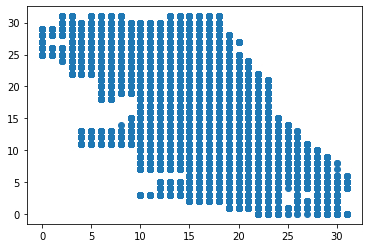

In [16]:
plt.scatter(lst[:,0],lst[:,1])

### b) Variation spatiale des accidents

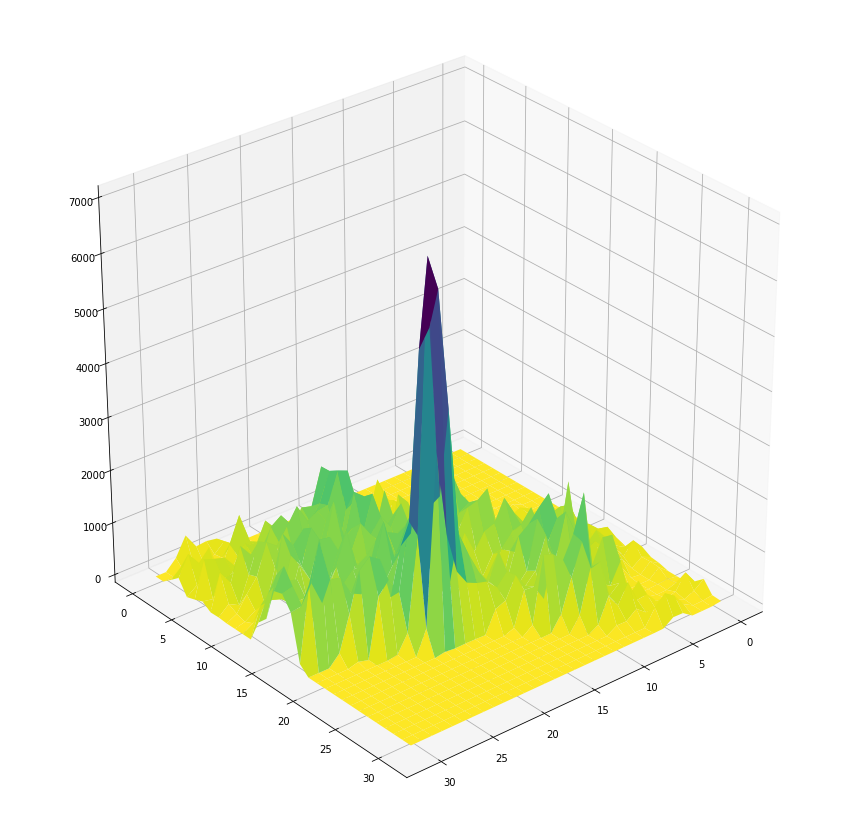

In [17]:
tabl['compte']=1
test = tabl.groupby(['x','y']).count().compte
test = test.unstack()
test = test.fillna(0)
x = [i for i in range(32)]
y = [i for i in range(32)]

pos = np.zeros((32,32))


for i in x:
  for j in y:
    pos[j,i]=test[i][j]

x,y=np.meshgrid(x,y)

fig = plt.figure(figsize=(15,15))

ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(x, y, pos, cmap=cm.viridis_r)
ax.view_init(elev=30, azim=50)

Nous pouvons voir immédiatement que la répartition des accidents sur Chicago n'est pas uniforme. Certaines cases de notre grille concentrent beaucoup plus d'accidents que les autres. La case médiane contient 0.15% des accidents tandis que la case la plus accidentée en contient 1.5%.

Il y a donc des zones beaucoup plus dangereuses en voiture. Pourtant les routes les plus dangereuses ne sont pas dans les zones les plus dangereuses.

## 2) Visualisation temporelle

### a) Répartition des accidents par heure sur une semaine 

Text(0, 0.5, "Nombre d'accidents")

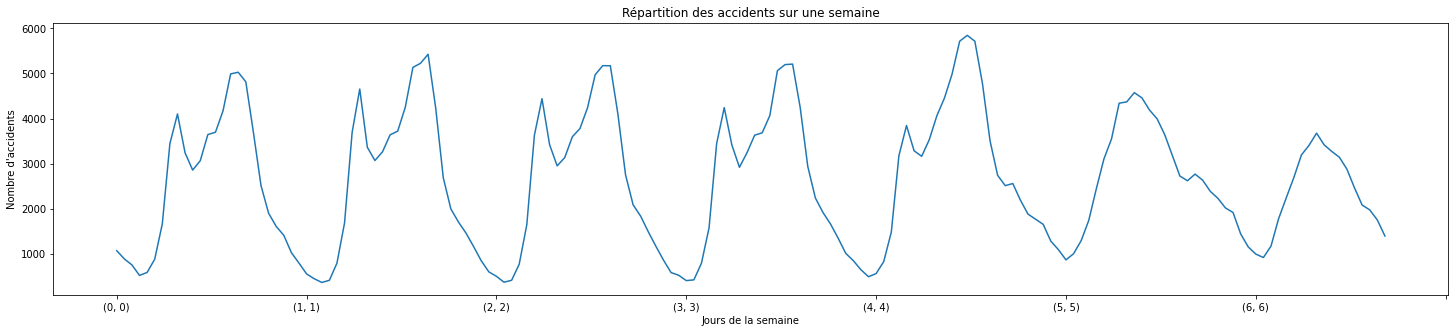

In [18]:
tabl['compte']=1
tabl.groupby(['CRASH_WEEKDAY', 'CRASH_HOUR']).count().compte.plot(figsize=(25,5))
plt.title('Répartition des accidents sur une semaine')
plt.xlabel("Jours de la semaine")
plt.ylabel("Nombre d'accidents")

Nous avons tracé la courbe du nombre d'accidents par heures sur une durée d'une semaine.

Nous retrouvons bien les départs au travail entre 7 et 9h qui correspondent à un pic d'accident. Il y a un deuxième pic de 14 à 16h, ce qui correspond au retour du travail et aux déplacements liés aux activités des habitants de Chicago.

Le week-end, l'unique pic d'accident se situe vers le milieu de la journée car la plupart des habitants ne se déplacent pas le matin.

Il y a une légère hausse des accidents les vendredi et samedi soir, ce qui peut être expliqué par les individus allant et rentrant en soirée.





### b) Répartition des accidents par jour sur une année

Text(0, 0.5, "Nombre d'accidents")

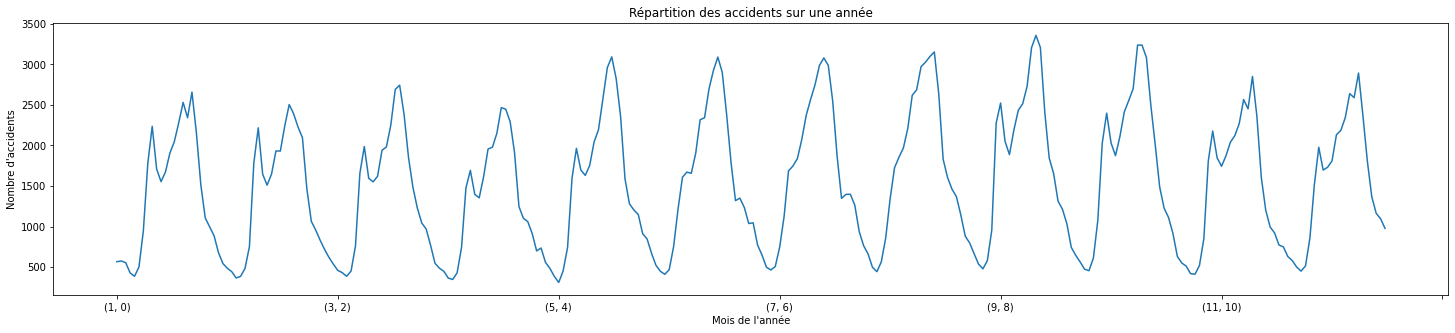

In [19]:
tabl['compte']=1
tabl.groupby(['CRASH_Month', 'CRASH_HOUR']).count().compte.plot(figsize=(25,5))
plt.title('Répartition des accidents sur une année')
plt.xlabel("Mois de l'année")
plt.ylabel("Nombre d'accidents")


Ici, nous avons affiché le nombre d'accidents par heures de la journée pour chaques mois de l'année. La logique trouvée sur les jours de la semaine se retrouve sur l'année. En juin, juillet et août, les américains partent en vacances donc le nombre d'accidents augmentent au cours de la journée jusqu'à 15h, puis redescent en même temps que l'activité de la ville diminue. Durant les autres mois, un nombre beaucoup plus grand de personnes vont travailler chaques jours donc on observe bien des pics d'accidents que l'on peut associer aux départs. Le pic de l'après-midi est légèrements décallé vers une horaire plus tardive car les employés rentrent du travail de 15h à 18h.

De manière plus globale, nous observons qu'il y a plus d'accidents durant les mois les plus ensoleillés, peut-être car les habitants de Chicago préfèrent sortir quand il y a encore du soleil.

# III/ Etude statistique

## 1) Influence des facteurs extérieurs sur les accidents

[Text(0, 0, 'FAILING TO YIELD RIGHT-OF-WAY'),
 Text(0, 0, 'UNABLE TO DETERMINE'),
 Text(0, 0, 'IMPROPER OVERTAKING/PASSING'),
 Text(0, 0, 'EXCEEDING SAFE SPEED FOR CONDITIONS'),
 Text(0, 0, 'IMPROPER BACKING'),
 Text(0, 0, 'DISTRACTION - FROM INSIDE VEHICLE'),
 Text(0, 0, 'IMPROPER LANE USAGE'),
 Text(0, 0, 'FOLLOWING TOO CLOSELY'),
 Text(0, 0, 'FAILING TO REDUCE SPEED TO AVOID CRASH'),
 Text(0, 0, 'DISREGARDING TRAFFIC SIGNALS'),
 Text(0, 0, 'NOT APPLICABLE'),
 Text(0, 0, 'EXCEEDING AUTHORIZED SPEED LIMIT'),
 Text(0, 0, 'IMPROPER TURNING/NO SIGNAL'),
 Text(0, 0, 'DISTRACTION - FROM OUTSIDE VEHICLE'),
 Text(0, 0, 'OPERATING VEHICLE IN ERRATIC, RECKLESS, CARELESS, NEGLIGENT OR AGGRESSIVE MANNER'),
 Text(0, 0, 'WEATHER'),
 Text(0, 0, 'EQUIPMENT - VEHICLE CONDITION'),
 Text(0, 0, 'DISREGARDING STOP SIGN'),
 Text(0, 0, 'UNDER THE INFLUENCE OF ALCOHOL/DRUGS (USE WHEN ARREST IS EFFECTED)'),
 Text(0, 0, 'VISION OBSCURED (SIGNS, TREE LIMBS, BUILDINGS, ETC.)'),
 Text(0, 0, 'DRIVING SKILLS/KNOWL

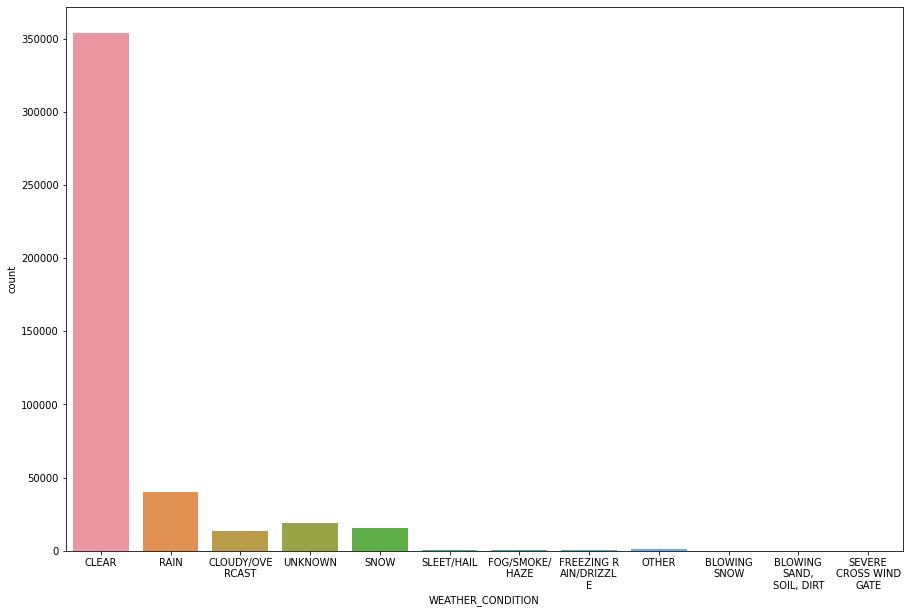

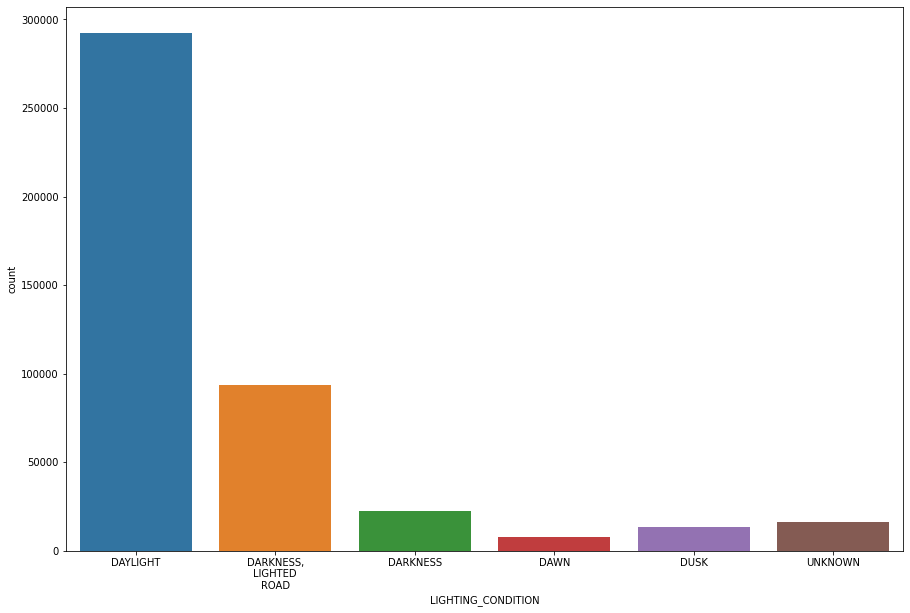

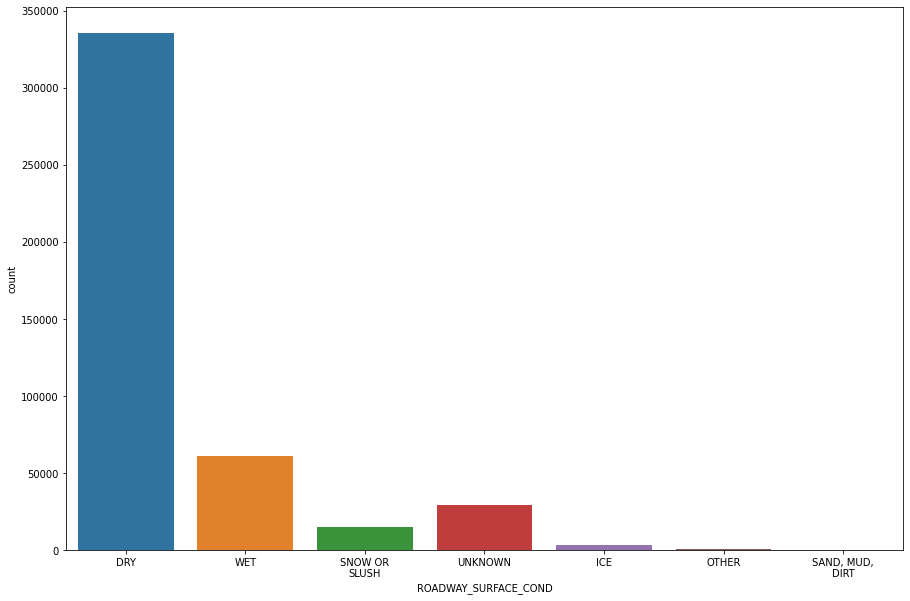

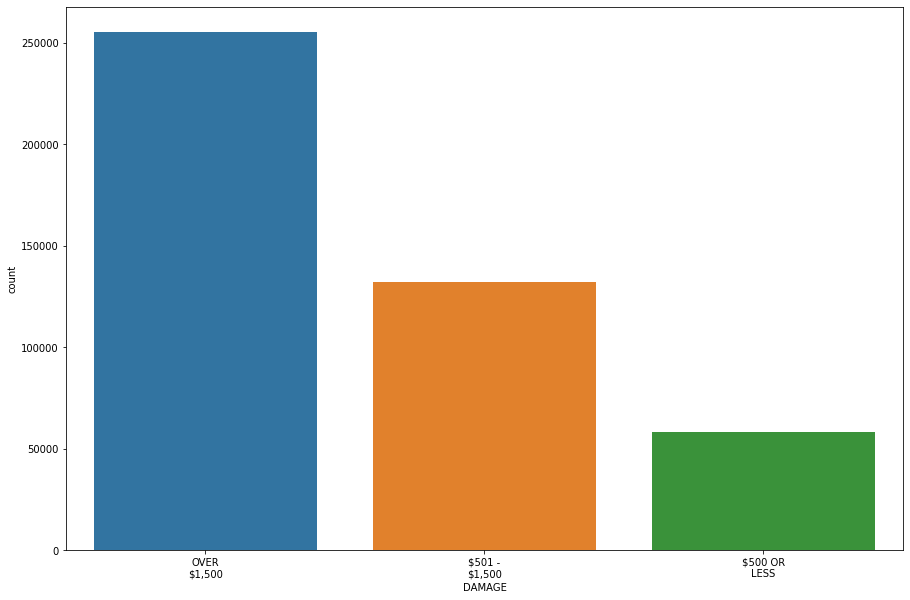

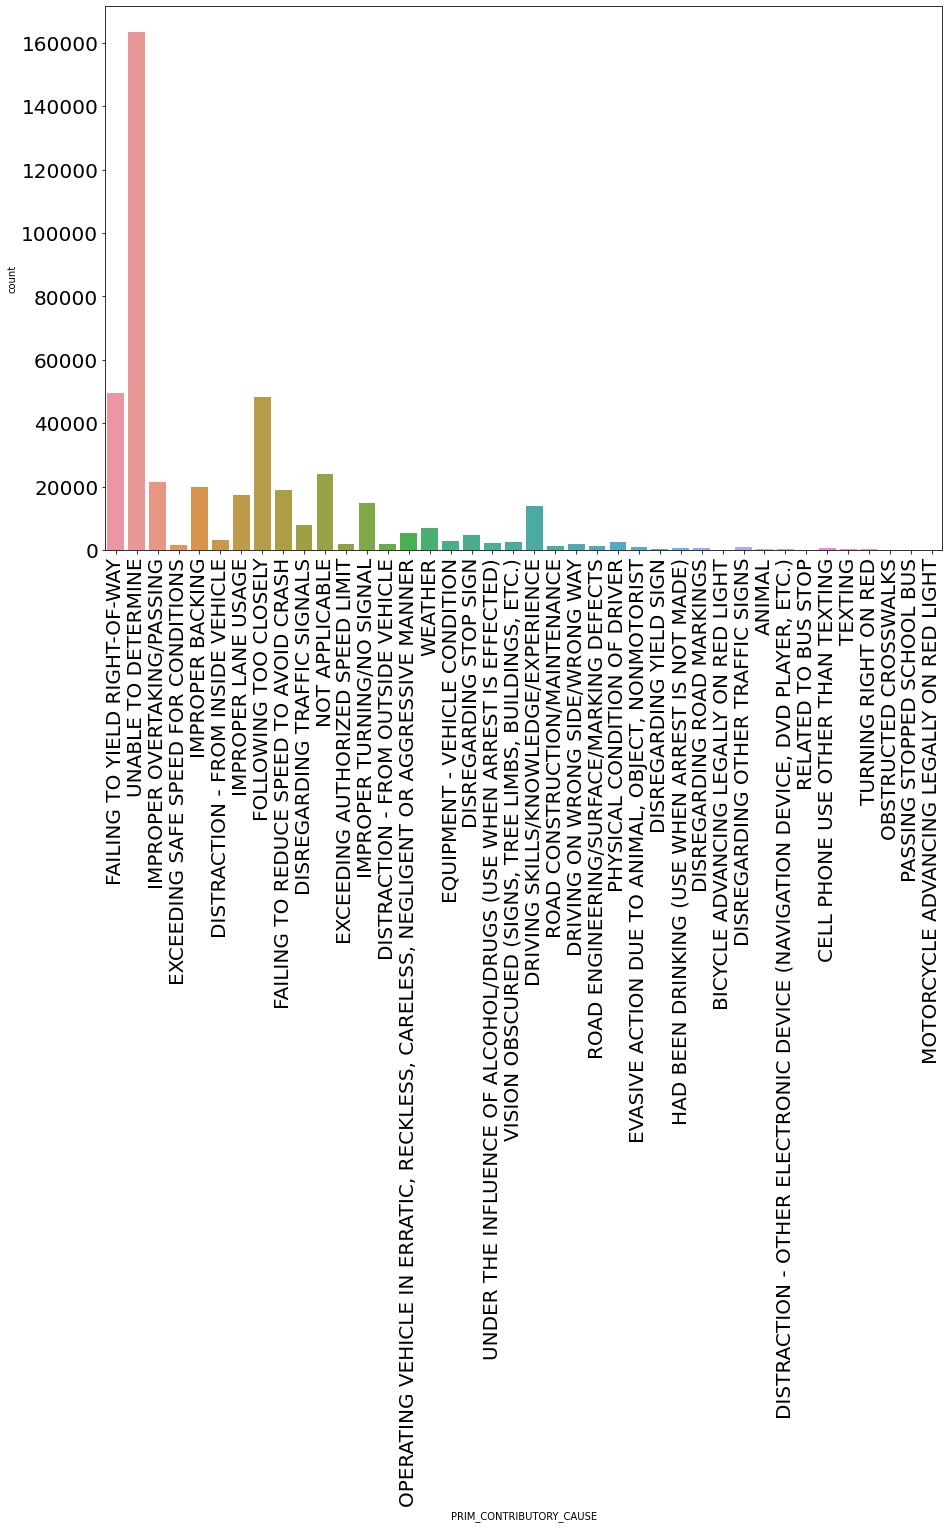

In [20]:
max_width = 10
cols = ['WEATHER_CONDITION', 'LIGHTING_CONDITION',\
        'ROADWAY_SURFACE_COND', 'DAMAGE']
for i, col in enumerate(data[cols]):
    plt.figure(i, figsize = (15.0,10.0))
    b = sns.countplot(x=col, data=data)
    b.tick_params(labelsize=10)
    b.set_xticklabels(textwrap.fill(x.get_text(), max_width) for x in b.get_xticklabels())

plt.figure(10, figsize = (15.0,10.0))
b = sns.countplot(x=data['PRIM_CONTRIBUTORY_CAUSE'], data=data)
b.tick_params(labelsize=20)
b.set_xticklabels(b.get_xticklabels(), rotation = 90)

On remarque que la grande majorité des accidents a lieu dans des conditions normales à causes d'erreur de conduite. Les erreurs d'anticipations des conducteurs liées aux conditions extérieures semblent plus rares. Le comportement humain est donc la cause la plus courante des acccidents.

## 2) Représentation des accidents selon les différents catégories

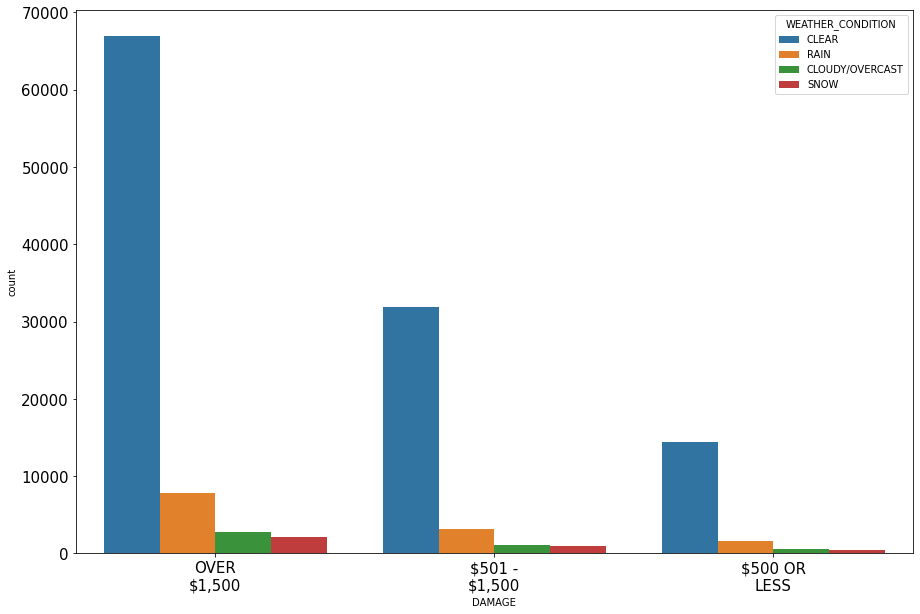

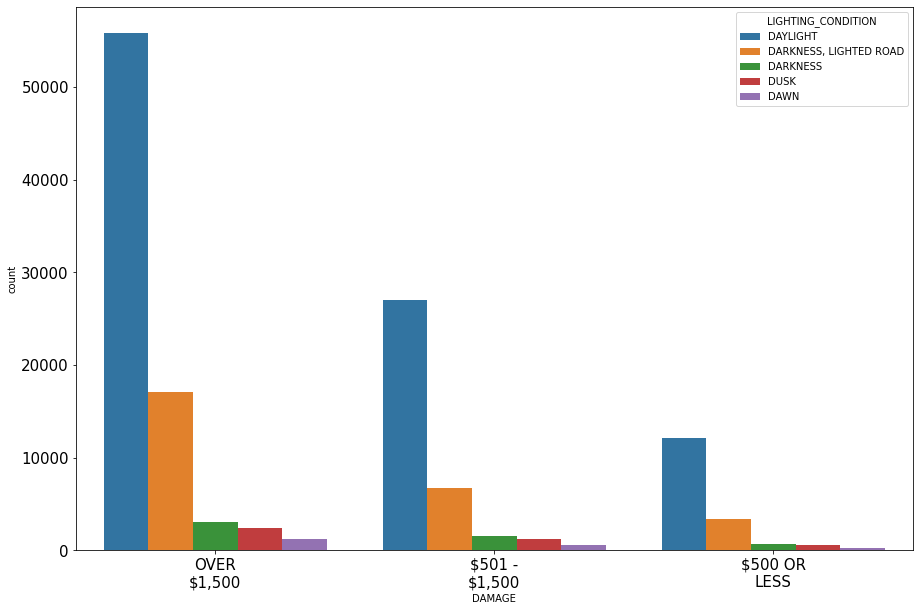

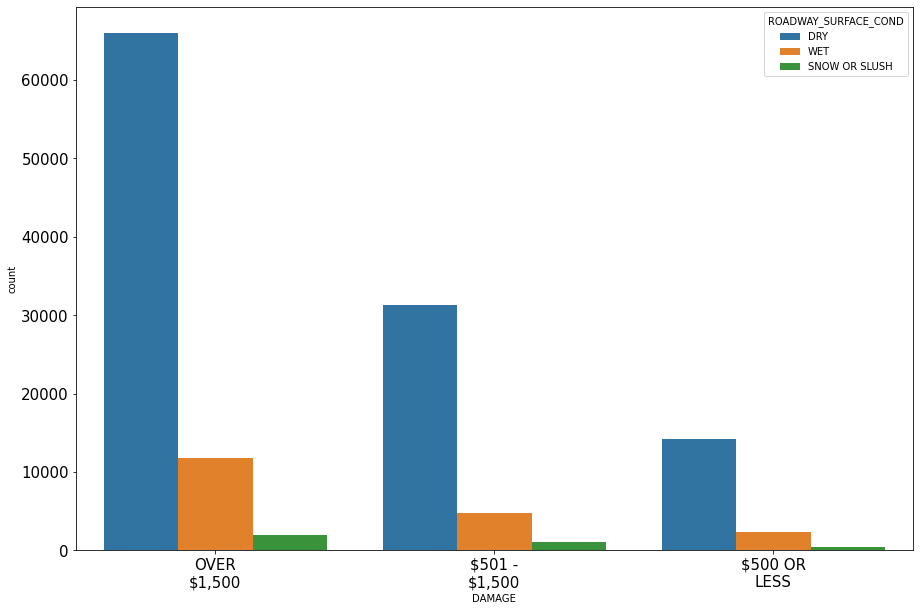

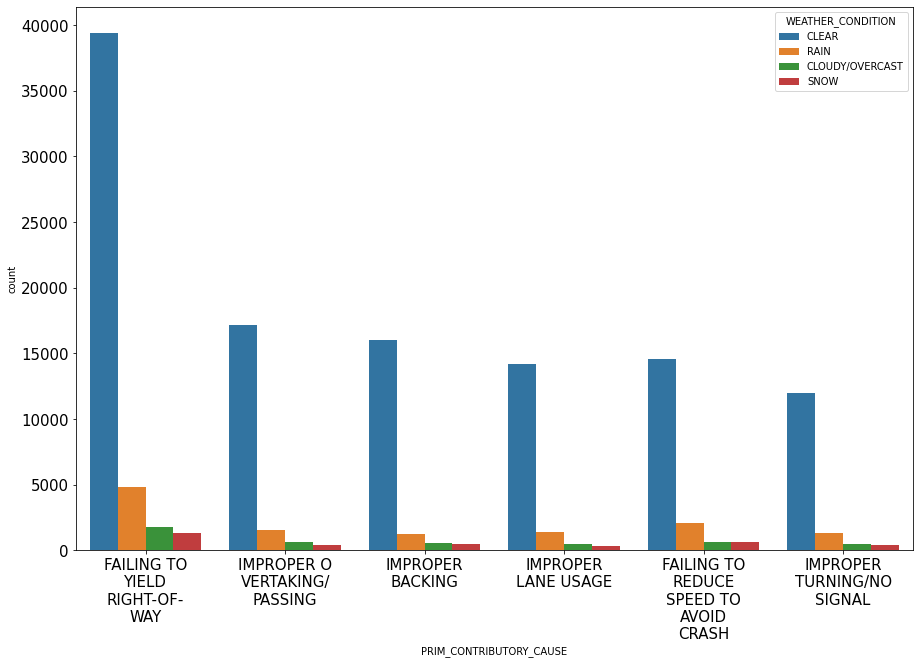

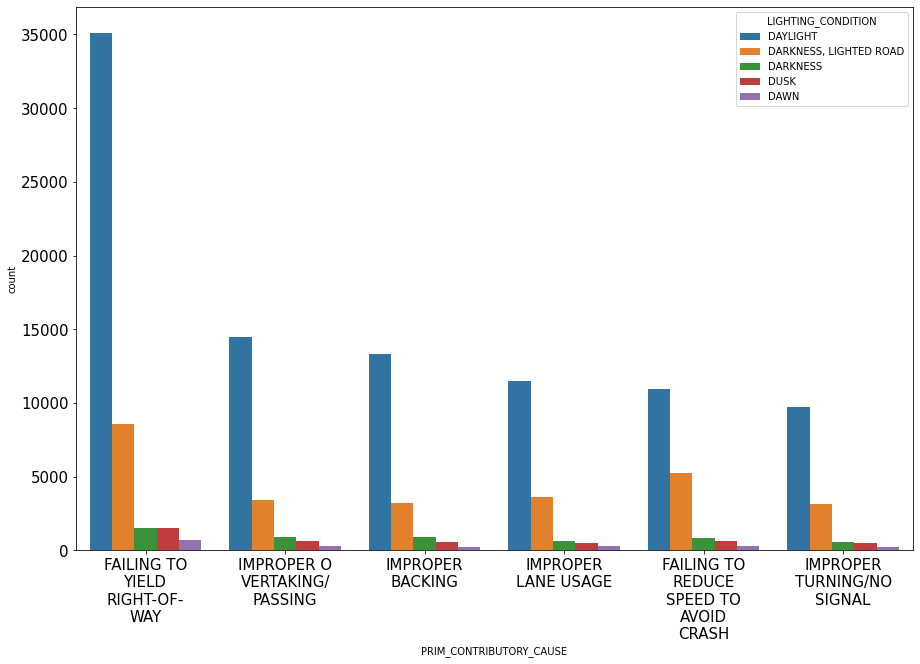

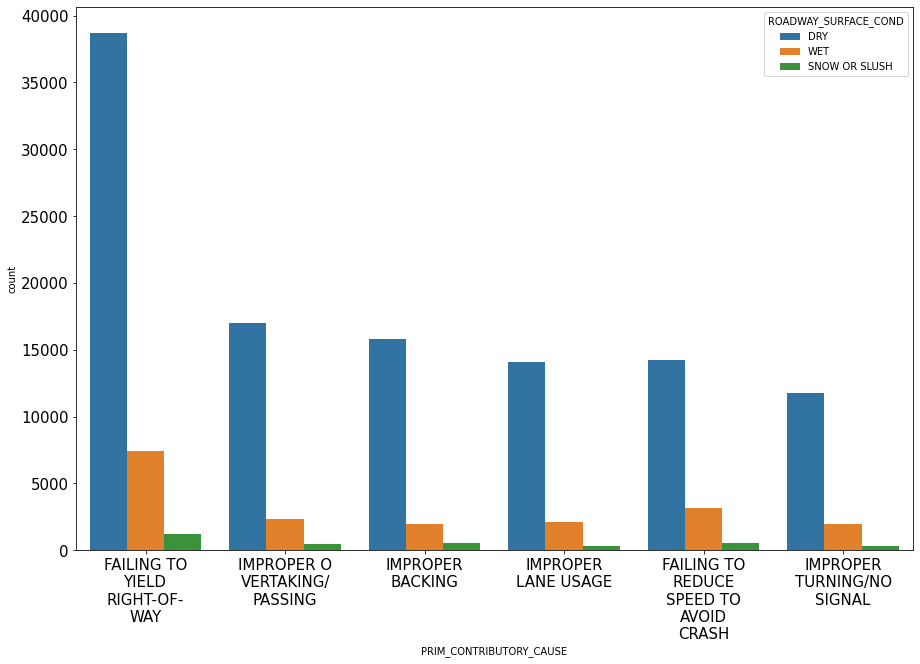

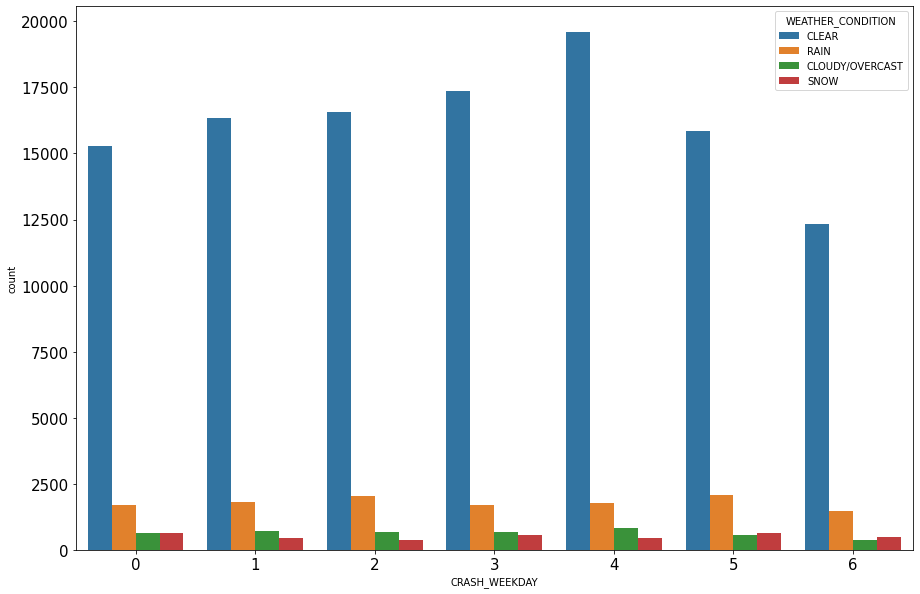

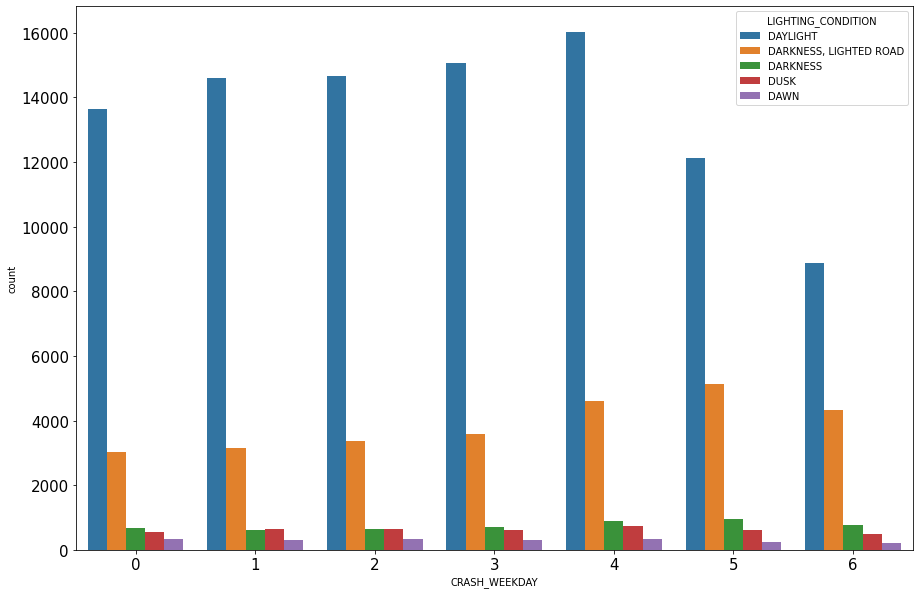

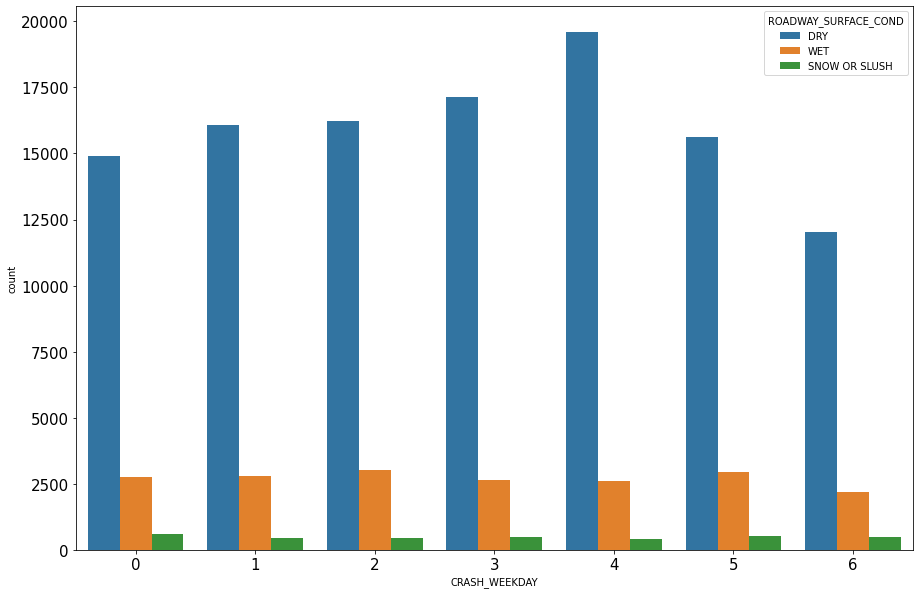

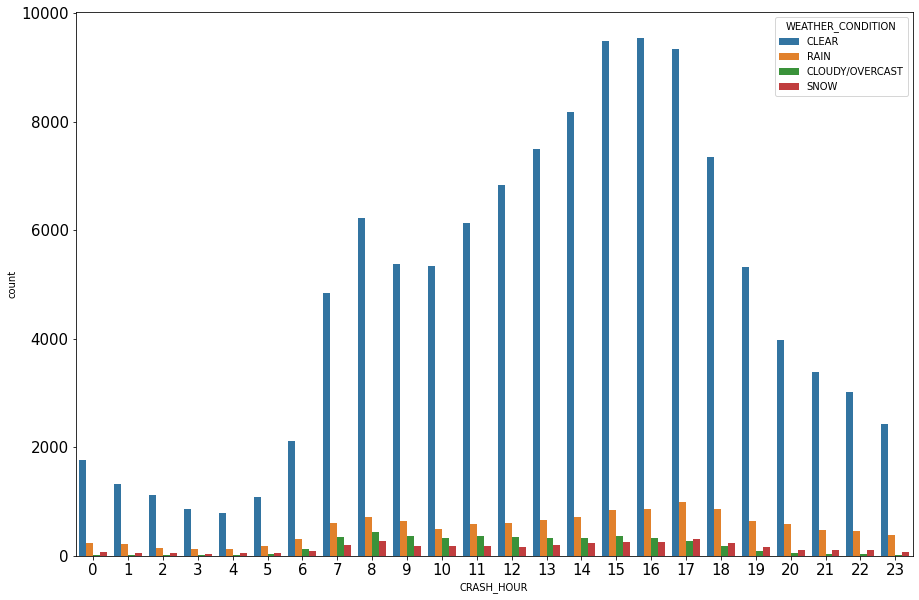

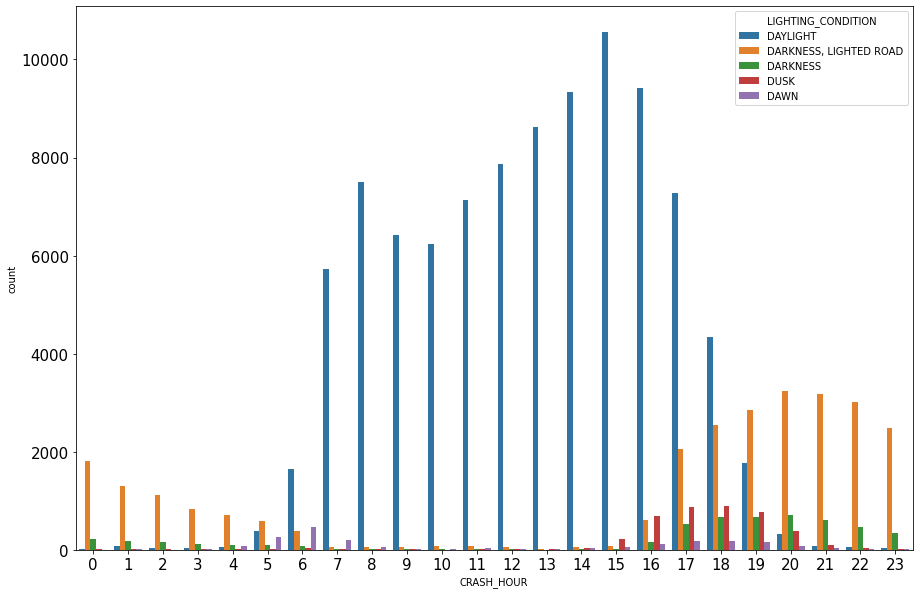

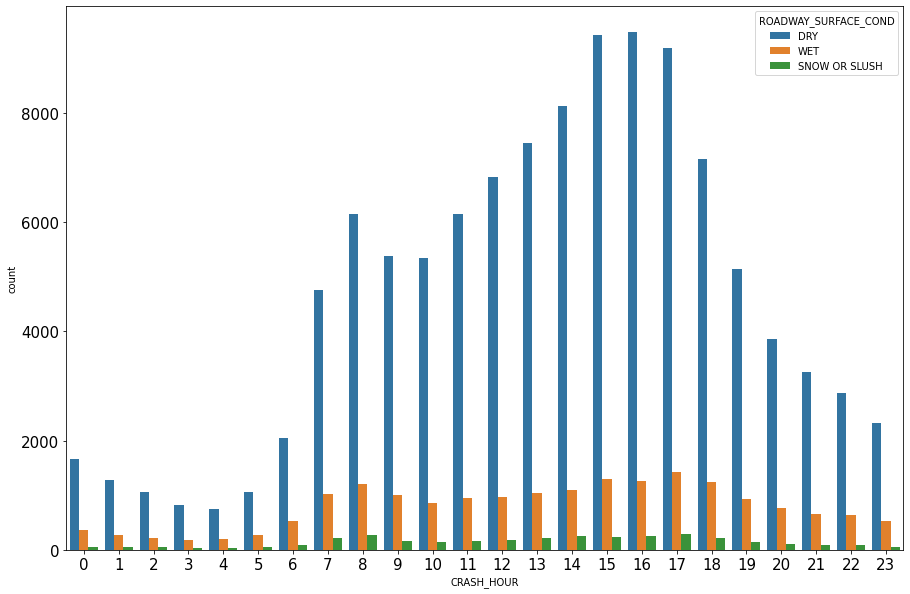

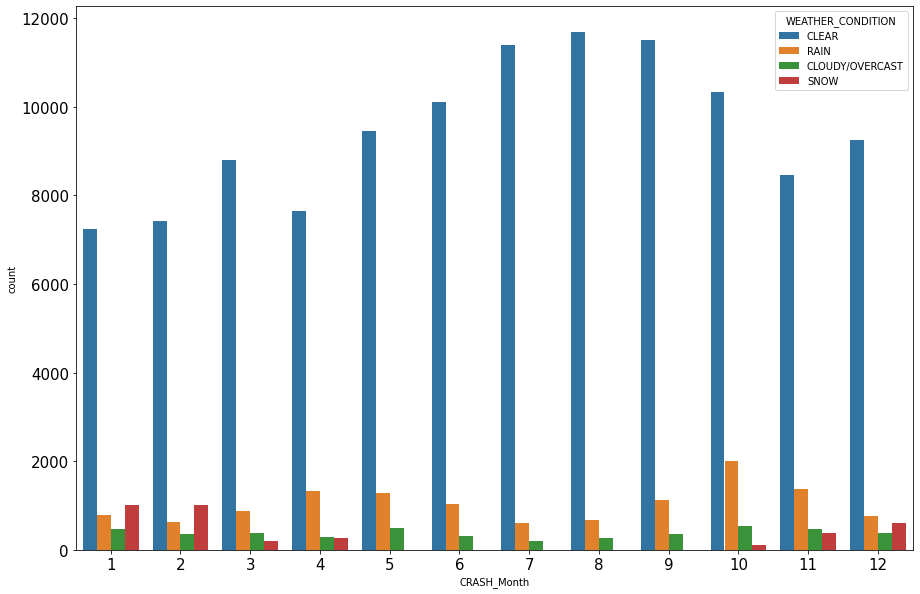

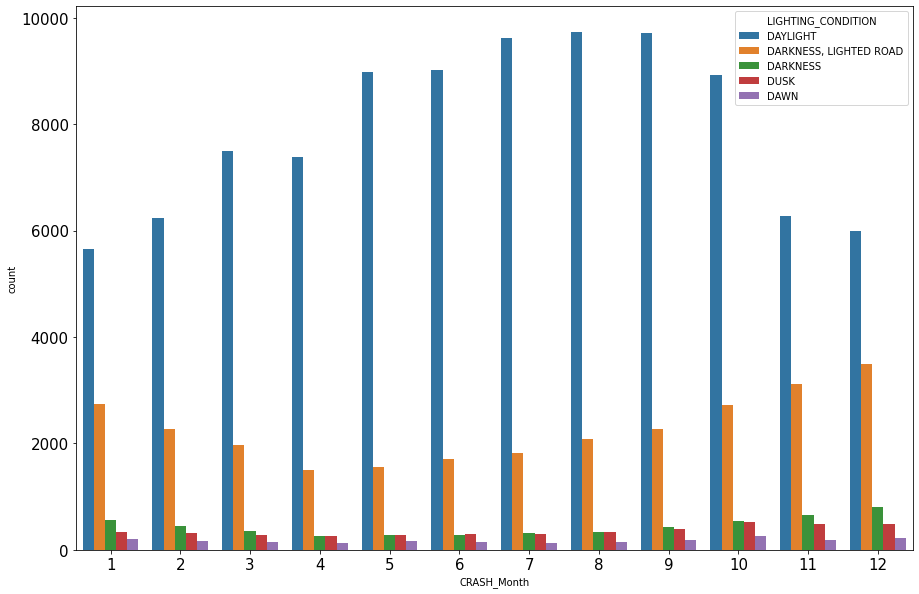

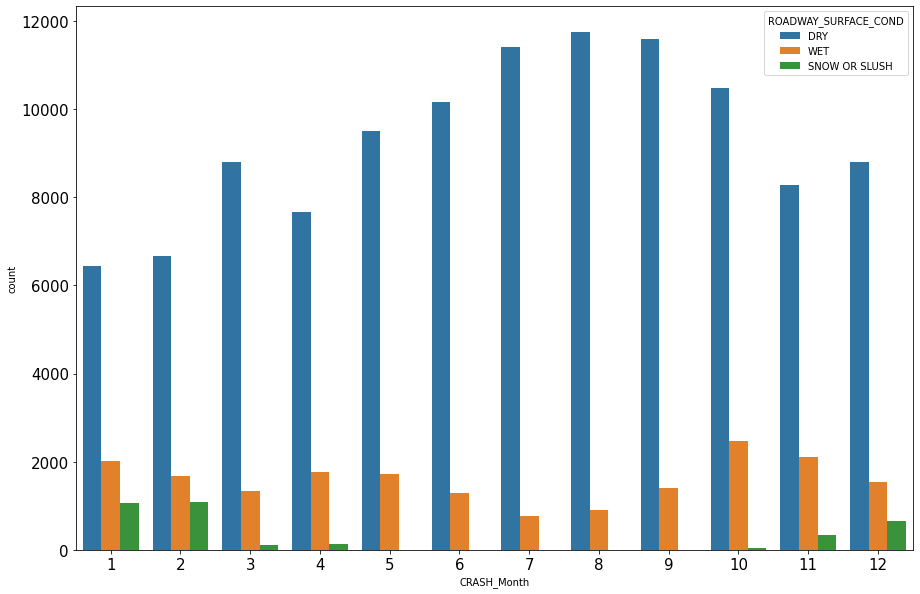

In [21]:
data_vis=data
data_vis = data_vis.loc[data_vis['WEATHER_CONDITION']\
                        .isin(['CLEAR', 'RAIN', 'CLOUDY/OVERCAST', 'SNOW'])]
data_vis = data_vis.loc[~data_vis['LIGHTING_CONDITION']\
                        .isin(['UNKNOWN'])]
data_vis = data_vis.loc[data_vis['ROADWAY_SURFACE_COND']\
                        .isin(['DRY', 'WET', 'SNOW OR SLUSH'])]
data_vis = data_vis.loc[data_vis['PRIM_CONTRIBUTORY_CAUSE']\
                        .isin(['FAILING TO YIELD RIGHT-OF-WAY',\
                               'IMPROPER OVERTAKING/PASSING',\
                              'IMPROPER BACKING', \
                              'IMPROPER LANE USAGE',\
                              'FOLLOWING TO CLOSELY',\
                              'FAILING TO REDUCE SPEED TO AVOID CRASH',\
                              'IMPROPER TURNING/NO SIGNAL',\
                              'DRIVING SKILLS/KONWLEDGE/EXPERIENCE'])]
                              
cols = ['DAMAGE', 'PRIM_CONTRIBUTORY_CAUSE',\
       'CRASH_WEEKDAY', 'CRASH_HOUR', 'CRASH_Month']

hues = ['WEATHER_CONDITION', 'LIGHTING_CONDITION',\
        'ROADWAY_SURFACE_COND']

max_width = 10

i=0
for col in data_vis[cols]:
    for hue in data_vis[hues]:
        plt.figure(i, figsize=(15.0,10.0))
        b = sns.countplot(x=col, hue=hue, data=data_vis)
        b.tick_params(labelsize=15)
        b.set_xticklabels(textwrap.fill(x.get_text(), max_width) for x in b.get_xticklabels())
        i+=1

Aucune anomalie lors de la combinaison des conditions externes avec d'autres variables. La plupart des accidents se produisent dans des "conditions parfaites", c'est-à-dire par temps clair, sur route sèche et en plein jour. Cela permet de conclure que les facteurs externes jouent un rôle mineur et que le comportement humain est de loin le facteur principal. -> les humains sont stupides

Questions : y a-t-il des différences de ces conditions par cellule ? Ainsi, dans une cellule, de nombreux accidents se produisent la nuit, etc...

Peut-être : concentrez-vous uniquement sur les accidents qui se produisent dans des conditions non idéales.


## 3) Réprésentation des accidents en fonction de leur gravité 

In [25]:
#removing conditions like 'unkown' and those which do not occur in large number
data_vis=data_0
data_vis = data_vis.loc[data_vis['WEATHER_CONDITION']\
                        .isin(['CLEAR', 'RAIN', 'CLOUDY/OVERCAST', 'SNOW'])]
data_vis = data_vis.loc[~data_vis['LIGHTING_CONDITION']\
                        .isin(['UNKNOWN'])]
data_vis = data_vis.loc[data_vis['ROADWAY_SURFACE_COND']\
                        .isin(['DRY', 'WET', 'SNOW OR SLUSH'])]

data_vis = data_vis.loc[data_vis['INJURIES_TOTAL']\
                        .isin(['0.0', '1.0', '2.0', '3.0'])]

data_vis = data_vis.loc[data_vis['INJURIES_FATAL']\
                        .isin(['1.0', '2.0', '3.0'])]



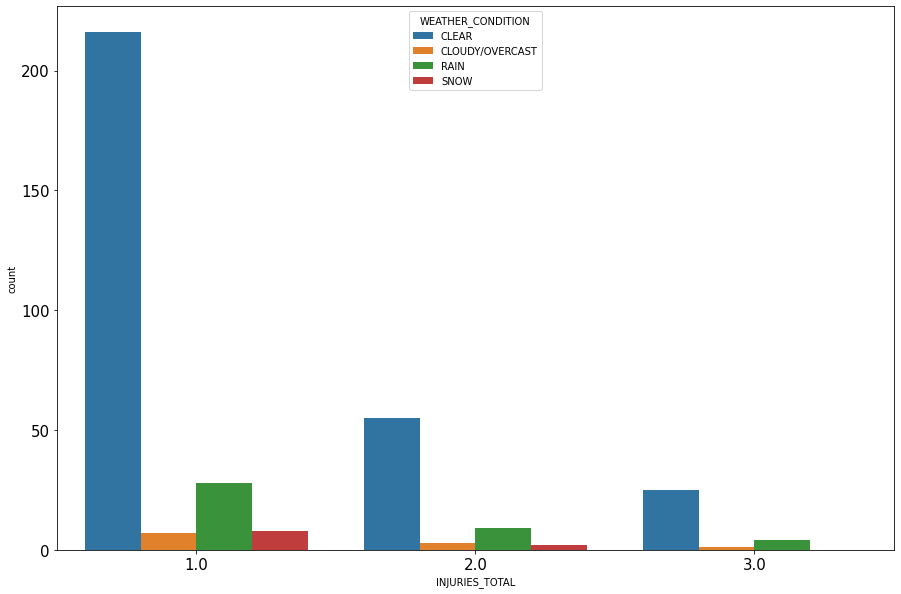

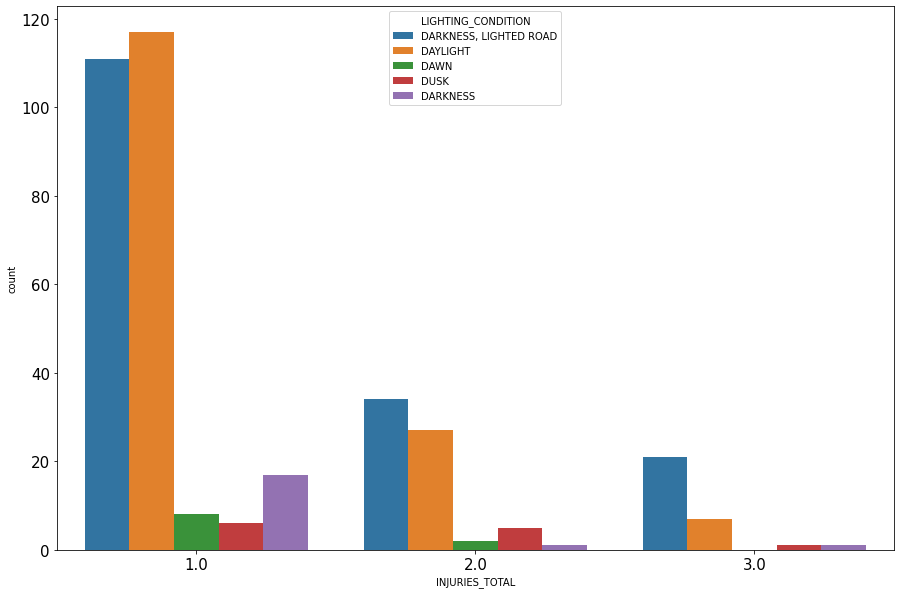

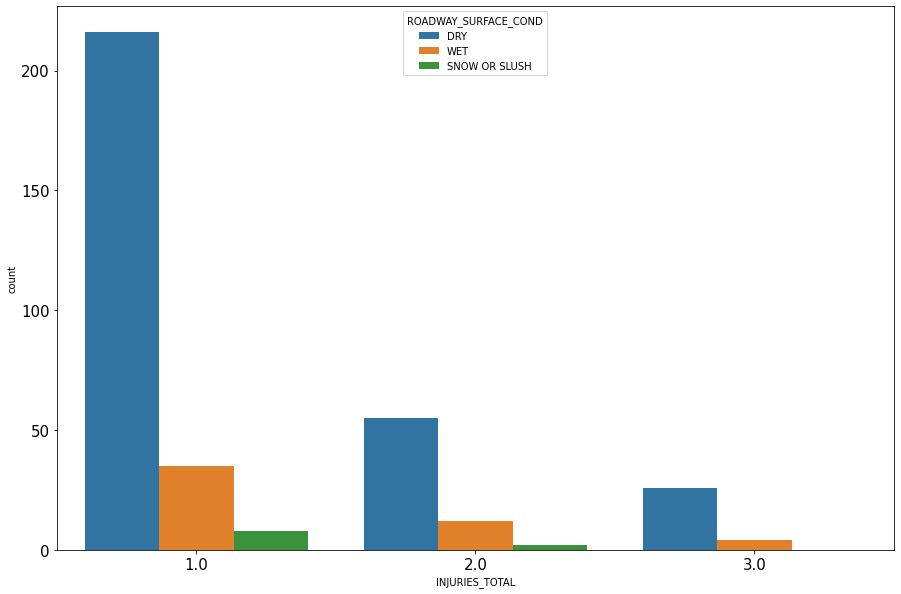

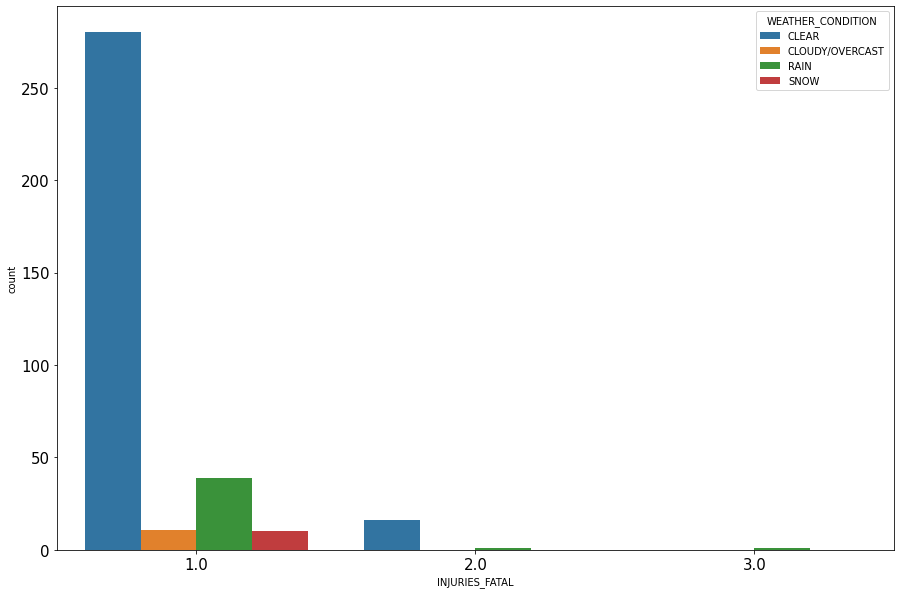

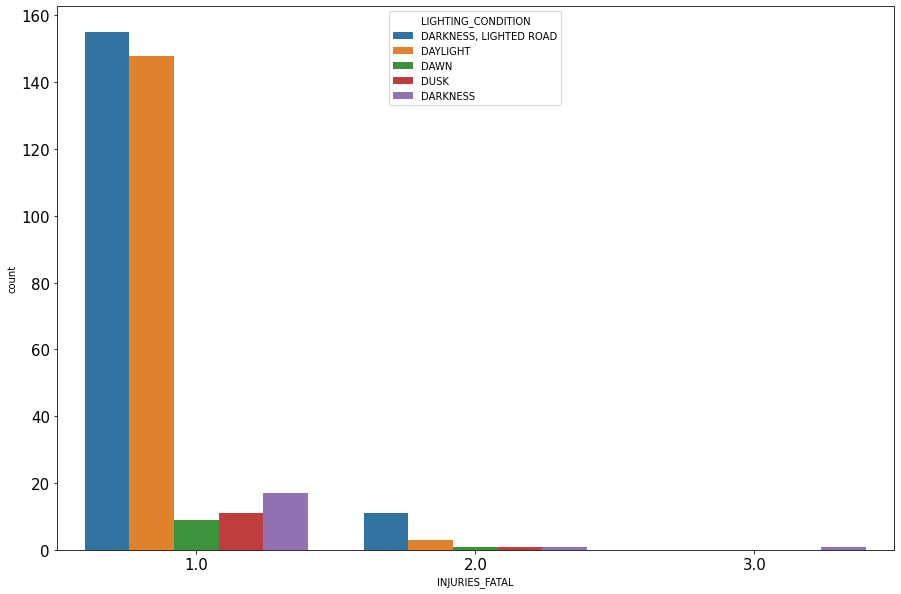

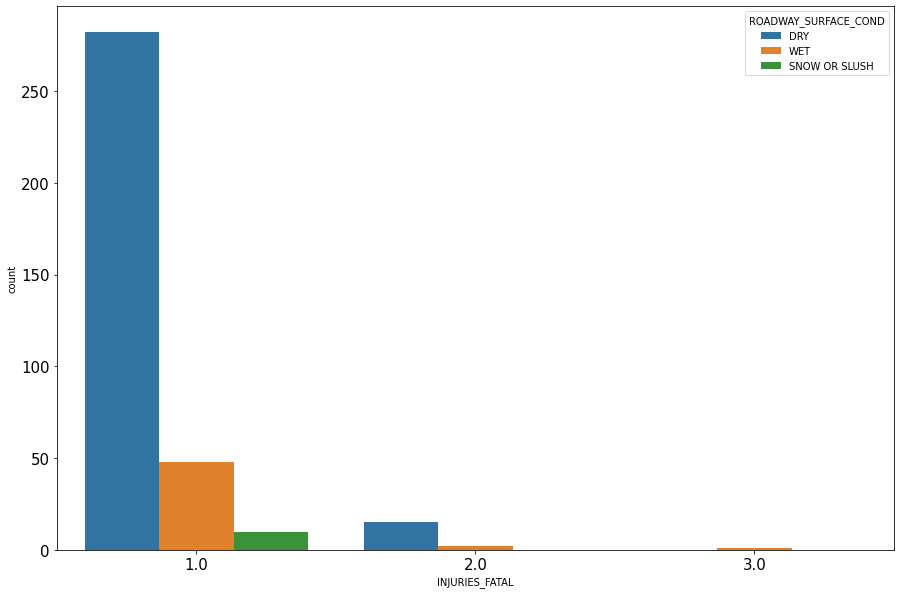

In [26]:
cols = ['INJURIES_TOTAL', 'INJURIES_FATAL']

hues = ['WEATHER_CONDITION', 'LIGHTING_CONDITION',\
        'ROADWAY_SURFACE_COND']

max_width = 10

i=0
for col in data_vis[cols]:
    for hue in data_vis[hues]:
        plt.figure(i, figsize=(15.0,10.0))
        b = sns.countplot(x=col, hue=hue, data=data_vis)
        b.tick_params(labelsize=15)
        b.set_xticklabels(textwrap.fill(x.get_text(), max_width) for x in b.get_xticklabels())
        i+=1

L'obscurité et la poussière sont des causes d'accidents graves. Ils augmentent de manière considérable le nombre de blessés et donc les frais pour les assurances. 

# How granular should the grid be?

Pour les algos de machine learning, nous allons fractionner la ville de Chicago sous forme de rectangle afin de déterminer quelles sont les zones de la ville les plus dangereuses. 

Nous voulons dans cette partie, déterminer quelle est la taille de grille la plus adapté : il faut que la zone soit la plus précise possible, mais il faut aussi suffisament de données dans chacune des zones pour faire de la prédiction dessus. 

In [31]:
def compare_grid(grid, exp_qt_cells, ax, row, col):
    grid_version = data_1.groupby(['{}'.format(grid)]).size()
    grid_version.mean()

    empty_cells_perc = ((exp_qt_cells - len(grid_version))/ exp_qt_cells)*100

    print("Metrics for {}:".format(grid))
    print("Empty cells: {:.2f}%, {} absolute.".format(empty_cells_perc, exp_qt_cells - len(grid_version)))
    print("Mean Accidents: {:.2f}, with std: {:.2f} and median: {}"\
          .format(grid_version.mean(), grid_version.std(), grid_version.median()))
    print("")
    grid_version.plot(kind='hist', bins=50,\
                      title='Number of acidents per cell in version:{}'.format(grid),\
                      ax=ax[row,col], figsize=(10,7))

Metrics for grid_33:
Empty cells: 45.04%, 504 absolute.
Mean Accidents: 295.55, with std: 278.97 and median: 257.0

Metrics for grid_48:
Empty cells: 46.67%, 1066 absolute.
Mean Accidents: 149.23, with std: 144.88 and median: 121.0

Metrics for grid_67:
Empty cells: 49.31%, 2207 absolute.
Mean Accidents: 80.11, with std: 83.98 and median: 59.0

Metrics for grid_96:
Empty cells: 52.05%, 4755 absolute.
Mean Accidents: 41.50, with std: 49.31 and median: 27.0



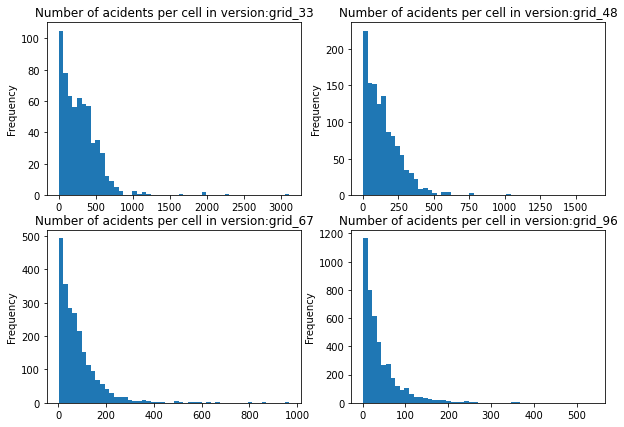

In [33]:
f, ax = plt.subplots(2,2)

compare_grid('grid_33', 1119, ax, 0, 0)
compare_grid('grid_48', 2284, ax, 0, 1)
compare_grid('grid_67', 4476, ax, 1, 0)
compare_grid('grid_96', 9135, ax, 1, 1)

Avec 33 cellules, nous avons encore un nombre élevé de cellules vides car la boîte de délimitation couvre également les zones non icago (limites du lac et hors des villes).

L'augmentation du nombre de cellules vides est marginale lorsque l'on augmente le nombre de cellules. L'augmentation du nombre de cellules signifie qu'une seule cellule deviendra plus petite et pourrait alors potentiellement être rendue hors des limites de la ville.

Le résultat est que les données ne sont pas rares et nous pouvons supposer que la plupart des cellules ont suffisamment de données pour prédire l'avenir à partir d'observations historiques. En raison de certaines valeurs extrêmes, nous vérifions également la médiane qui est robuste contre les valeurs aberrantes.

Nous aimerions choisir la version de la grille avec la plupart des cellules et donc la granularité la plus élevée d'une "zone à risque" (qui est une cellule). Cependant, la granularité doit être équilibrée par la rareté des données. Nous avons décidé de procéder avec la grille 67 car elle a une médiane de 140 accidents par cellule que nous jugeons suffisamment bonne. La grille 96 semble également acceptable, mais nous ne voulons pas prendre une première décision extrême. Si une analyse plus approfondie montre que le modèle pourrait fonctionner avec encore moins de données, nous reviendrons rapidement sur le processus de la grille 96.

La grille 67 nous fournit des cellules de 618m (S à N) x 403m (E à W) qui ont une taille de ~0,25 km carré.


# Conclusion


Pour conclure, la principale cause des accidents de voitures est l'inattention humaine. De plus, la répartiton des accidents sur le temps est étroitement liée aux habitudes de vie des habitants de Chicago. Il serait interessant de comparer les données du traffic routier journalier à ce dataset pour voir de quelle manière les bouchons et les accidents sont liés.